In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Function to read the .s2p file and parse the data
def read_s2p_file(filename):
    data = []
    
    with open(filename, 'r') as file:
        for line in file:
            # Skip comment lines that start with '#' or '!'
            if line.startswith('#') or line.startswith('!'):
                continue
            # Split the numeric data into columns
            columns = line.strip().split()
            if len(columns) == 9:  # Ensure correct number of columns
                freq = float(columns[0])
                s11_db = float(columns[1])
                s11_ang = float(columns[2])
                s21_db = float(columns[3])
                s21_ang = float(columns[4])
                s12_db = float(columns[5])
                s12_ang = float(columns[6])
                s22_db = float(columns[7])
                s22_ang = float(columns[8])
                
                # Append the data to the list
                data.append([freq, s11_db, s11_ang, s21_db, s21_ang, s12_db, s12_ang, s22_db, s22_ang])
    
    # Convert to a pandas DataFrame with proper column names
    df = pd.DataFrame(data, columns=[
        'Frequency (Hz)', 'S11 (dB)', 'S11 (Angle)', 'S21 (dB)', 'S21 (Angle)',
        'S12 (dB)', 'S12 (Angle)', 'S22 (dB)', 'S22 (Angle)'
    ])
    
    return df

In [11]:
# Usage
filename = r'C:\Users\smili\OneDrive\Documents\GitHub\Laboratorio_6_7_ITeDA\Mediciones\Mediciones CITI VNA\2024-09-20\PREAMP_HG_FS_GAIN0_CALIB_CH23_CITI0.s2p'
df = read_s2p_file(filename)
df

,Frequency (Hz),S11 (dB),S11 (Angle),S21 (dB),S21 (Angle),S12 (dB),S12 (Angle),S22 (dB),S22 (Angle)
0,3.000000e+05,-15.629313,8.940392,-12.521827,86.780020,-49.103802,-80.270995,-29.306456,4.038736
1,3.285326e+05,-15.326837,16.255891,-12.254079,86.858652,-47.345684,-9.309926,-28.477306,1.833813
2,3.570653e+05,-13.683967,10.731768,-11.266278,85.708453,-41.214245,102.009755,-29.008396,0.404908
3,3.855979e+05,-15.939926,1.348894,-10.303765,82.999244,-39.076026,-168.728179,-29.475497,1.524199
4,4.141306e+05,-12.850053,4.929841,-9.917033,85.436518,-38.960275,-159.547584,-29.096779,3.367737
...,...,...,...,...,...,...,...,...,...
6995,1.998859e+08,-9.849036,64.989933,-45.703670,66.291272,-46.121807,8.848335,-10.168885,-75.047789
6996,1.999144e+08,-10.478196,48.057607,-44.472873,27.129661,-49.397311,-66.735488,-10.156668,-75.203609
6997,1.999429e+08,-8.505538,56.765534,-47.098505,-11.925954,-43.653074,-39.739220,-10.154612,-75.157702
6998,1.999715e+08,-8.672397,49.895477,-49.144789,102.441540,-49.358088,-16.839513,-10.164156,-75.158178


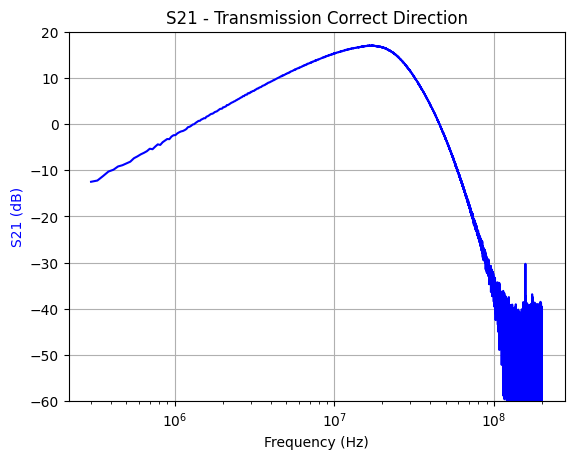

In [22]:
plt.plot(df['Frequency (Hz)'], df['S21 (dB)'], label='S21 (dB)', color='blue')
plt.title('S21 - Transmission Correct Direction')
plt.xlabel('Frequency (Hz)')
plt.ylabel('S21 (dB)', color='blue')
plt.xscale('log')
plt.ylim(-60,20)
plt.grid()

       Frequency                          V(out_fs)/V(Input_bode)
0  100000.000000  (-5.55814282560303e+00dB,1.28886341494500e+02°)
1  100230.523808  (-5.52830693300130e+00dB,1.28833615655105e+02°)
2  100461.579028  (-5.49849305534615e+00dB,1.28780856657310e+02°)
3  100693.166885  (-5.46870119753720e+00dB,1.28728064914451e+02°)
4  100925.288608  (-5.43893136421000e+00dB,1.28675240839744e+02°)


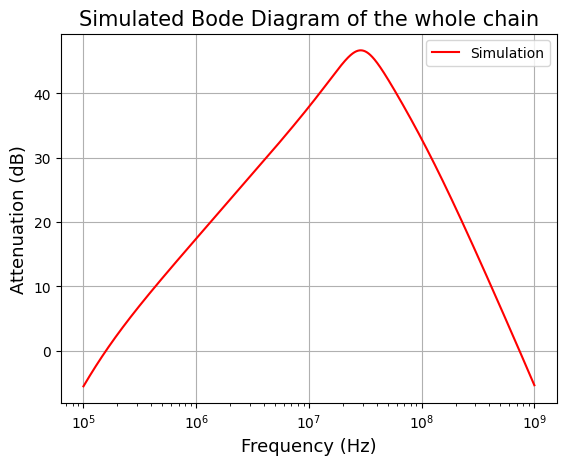

In [62]:
# Read the text file, using tab as the separator, and specify encoding
df_bode2 = pd.read_csv(r'C:\Users\smili\OneDrive\Documents\GitHub\Laboratorio_6_7_ITeDA\LTSpice\Octubre - Test Circuitos en configuración NO Inversor\bode_circuito_completo_con_capacitores_en_preamp_inversor_v1,5.txt', sep="\t", skiprows=1, names=['Frequency', 'V(out_fs)/V(Input_bode)'], encoding='ISO-8859-1')

# Check the first few rows to understand the structure
print(df_bode2.head())

# Extract the first element of V(out_fs), which is the dB value
df_bode2['Attenuation'] = df_bode2['V(out_fs)/V(Input_bode)'].apply(lambda x: float(x.split(',')[0][1:].replace('dB', '').strip()))  # Clean the dB part

# Plotting
plt.plot(df_bode2['Frequency'], df_bode2['Attenuation'], label='Simulation', color='red')
plt.xscale('log')  # Set x-axis to log scale
plt.title('Simulated Bode Diagram of the whole chain', size=15)
plt.xlabel('Frequency (Hz)', size=13)
plt.ylabel('Attenuation (dB)', size=13)
plt.legend()
plt.grid()
plt.show()


       Frequency                          V(out_fs)/V(Input_bode)
0  100000.000000  (-5.60243020054997e+00dB,1.28618832717135e+02°)
1  100230.523808  (-5.57264793293364e+00dB,1.28565845716949e+02°)
2  100461.579028  (-5.54288767901214e+00dB,1.28512825778977e+02°)
3  100693.166885  (-5.51314944310451e+00dB,1.28459773315179e+02°)
4  100925.288608  (-5.48343322926565e+00dB,1.28406688737371e+02°)


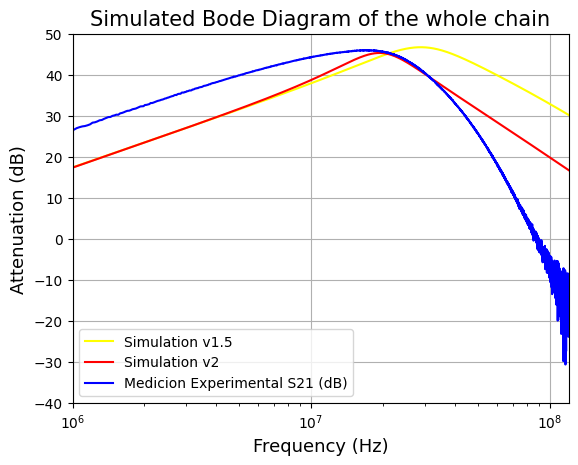

In [65]:
# Read the text file, using tab as the separator, and specify encoding
df_bode = pd.read_csv(r'C:\Users\smili\OneDrive\Documents\GitHub\Laboratorio_6_7_ITeDA\LTSpice\Octubre - Test Circuitos en configuración NO Inversor\bode_circuito_completo_con_capacitores_en_preamp_inversor_v2.txt', sep="\t", skiprows=1, names=['Frequency', 'V(out_fs)/V(Input_bode)'], encoding='ISO-8859-1')

# Check the first few rows to understand the structure
print(df_bode.head())

# Extract the first element of V(out_fs), which is the dB value
df_bode['Attenuation'] = df_bode['V(out_fs)/V(Input_bode)'].apply(lambda x: float(x.split(',')[0][1:].replace('dB', '').strip()))  # Clean the dB part

# Plotting
plt.plot(df_bode2['Frequency'], df_bode2['Attenuation'], label='Simulation v1.5', color='yellow')
plt.plot(df_bode['Frequency'], df_bode['Attenuation'], label='Simulation v2', color='red')
plt.plot(df['Frequency (Hz)'], 29+df['S21 (dB)'], label='Medicion Experimental S21 (dB)', color='blue')
plt.xscale('log')  # Set x-axis to log scale
plt.title('Simulated Bode Diagram of the whole chain', size=15)
plt.xlabel('Frequency (Hz)', size=13)
plt.ylabel('Attenuation (dB)', size=13)
plt.xlim(1e6, 1.2e8)
plt.ylim(-40, 50)
plt.legend()
plt.grid()
plt.show()


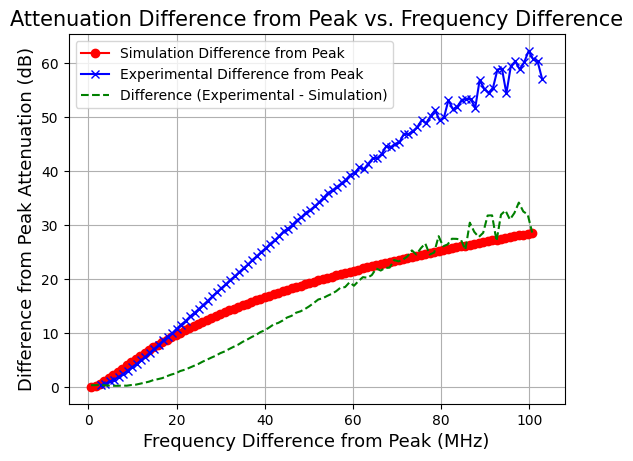

In [77]:
# Define frequency points of interest (e.g., 20MHz to 100MHz)
frequencies_to_check = np.linspace(20e6, 120e6, 100)



# Find peak attenuation and peak frequency for simulation data
peak_sim_attenuation = df_bode['Attenuation'].max()
peak_sim_frequency = df_bode['Frequency'][df_bode['Attenuation'].idxmax()]  # Find the frequency where peak occurs

# Interpolate attenuation for simulation data at the specified frequencies
sim_at_frequencies = np.interp(frequencies_to_check, df_bode['Frequency'], df_bode['Attenuation'])

# Calculate difference in attenuation from the peak for simulation data
sim_attenuation_diff = peak_sim_attenuation - sim_at_frequencies



# Find peak attenuation and peak frequency for experimental dat
peak_exp_attenuation = (df['S21 (dB)']).max()
peak_exp_frequency = df['Frequency (Hz)'][(df['S21 (dB)'].idxmax())]  # Find the frequency where peak occurs

# Interpolate attenuation for experimental data at the specified frequencies
exp_at_frequencies = np.interp(frequencies_to_check, df['Frequency (Hz)'], df['S21 (dB)'])

# Calculate difference in attenuation from the peak for experimental data
exp_attenuation_diff = peak_exp_attenuation - exp_at_frequencies



# Calculate the difference in frequency from the peak for both datasets
sim_frequency_diff = frequencies_to_check - peak_sim_frequency
exp_frequency_diff = frequencies_to_check - peak_exp_frequency

# Calculate the difference between the simulation and experimental attenuation differences
attenuation_difference = exp_attenuation_diff - sim_attenuation_diff



# Plot the attenuation difference vs. the frequency difference for simulation data
plt.plot(sim_frequency_diff / 1e6, sim_attenuation_diff, label='Simulation Difference from Peak', color='red', marker='o')

# Plot the attenuation difference vs. the frequency difference for experimental data
plt.plot(exp_frequency_diff / 1e6, exp_attenuation_diff, label='Experimental Difference from Peak', color='blue', marker='x')

# Plot the difference between the curves (experimental vs. simulation)
plt.plot(sim_frequency_diff / 1e6, attenuation_difference, label='Difference (Experimental - Simulation)', color='green', linestyle='--')

# Plot settings
plt.title('Attenuation Difference from Peak vs. Frequency Difference', size=15)
plt.xlabel('Frequency Difference from Peak (MHz)', size=13)
plt.ylabel('Difference from Peak Attenuation (dB)', size=13)
plt.grid(True)
plt.legend()
plt.show()


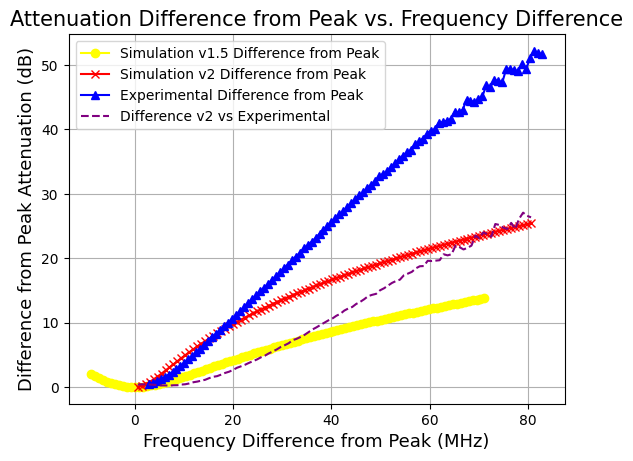

In [87]:
# Define frequency points of interest (e.g., 20MHz to 100MHz)
frequencies_to_check = np.linspace(20e6, 100e6, 100)

# For simulation v1.5:
peak_sim1_attenuation = df_bode2['Attenuation'].max()
peak_sim1_frequency = df_bode2['Frequency'][df_bode2['Attenuation'].idxmax()]
sim1_at_frequencies = np.interp(frequencies_to_check, df_bode2['Frequency'], df_bode2['Attenuation'])
sim1_attenuation_diff = peak_sim1_attenuation - sim1_at_frequencies

# For simulation v2:
peak_sim2_attenuation = df_bode['Attenuation'].max()
peak_sim2_frequency = df_bode['Frequency'][df_bode['Attenuation'].idxmax()]
sim2_at_frequencies = np.interp(frequencies_to_check, df_bode['Frequency'], df_bode['Attenuation'])
sim2_attenuation_diff = peak_sim2_attenuation - sim2_at_frequencies

# For experimental data (with 29 dB offset):
peak_exp_attenuation = df['S21 (dB)'].max()
peak_exp_frequency = df['Frequency (Hz)'][(df['S21 (dB)'].idxmax())]
exp_at_frequencies = np.interp(frequencies_to_check, df['Frequency (Hz)'], df['S21 (dB)'])
exp_attenuation_diff = peak_exp_attenuation - exp_at_frequencies

# Calculate the difference in attenuation between each simulation and experimental data
sim1_exp_diff = exp_attenuation_diff - sim1_attenuation_diff
sim2_exp_diff = exp_attenuation_diff - sim2_attenuation_diff

# Calculate the frequency difference from the peak for each curve
sim1_frequency_diff = frequencies_to_check - peak_sim1_frequency
sim2_frequency_diff = frequencies_to_check - peak_sim2_frequency
exp_frequency_diff = frequencies_to_check - peak_exp_frequency

# Plot the attenuation difference from peak for each curve
plt.plot(sim1_frequency_diff / 1e6, sim1_attenuation_diff, label='Simulation v1.5 Difference from Peak', color='yellow', marker='o')
plt.plot(sim2_frequency_diff / 1e6, sim2_attenuation_diff, label='Simulation v2 Difference from Peak', color='red', marker='x')
plt.plot(exp_frequency_diff / 1e6, exp_attenuation_diff, label='Experimental Difference from Peak', color='blue', marker='^')

# Plot the difference between the simulation curves and experimental data
#plt.plot(sim1_frequency_diff / 1e6, sim1_exp_diff, label='Difference v1.5 vs Experimental', color='green', linestyle='--')
plt.plot(sim2_frequency_diff / 1e6, sim2_exp_diff, label='Difference v2 vs Experimental', color='purple', linestyle='--')

# Plot settings
plt.title('Attenuation Difference from Peak vs. Frequency Difference', size=15)
plt.xlabel('Frequency Difference from Peak (MHz)', size=13)
plt.ylabel('Difference from Peak Attenuation (dB)', size=13)
plt.grid(True)
plt.legend()
plt.show()